## **Tugas 1**

<p>Dalam Tugas 1 ini, Anda akan melakukan analisis regresi menggunakan dataset cuaca dari Szeged, Hungaria, yang mencakup periode dari tahun 2006 hingga 2016. Dataset ini berisi informasi harian dan per jam mengenai suhu, tekanan, kecepatan angin, dan parameter cuaca lainnya.</p>

<p>Tujuan Tugas:</p>
<ul>
    <li> Menerapkan teknik-teknik analisis regresi untuk memodelkan hubungan antara variabel independen (seperti suhu, tekanan, dan kecepatan angin) dengan variabel dependen yang ditentukan.</li>
    <li> Mengevaluasi kinerja model regresi menggunakan metrik yang sesuai.</li>
</ul>

<p>Selama praktikum ini, Anda akan diminta untuk mengisi beberapa bagian kode program yang kosong. Pastikan Anda mengisi bagian-bagian tersebut dengan cermat, karena kode yang belum lengkap perlu diisi agar program dapat berjalan dengan baik dan model regresi dapat diterapkan dengan benar. Instruksi dan penjelasan lebih lanjut akan diberikan di bagian-bagian terkait dalam notebook ini.</p>


Sebelum memulai analisis, kita akan mengimpor beberapa library penting dan mengatur opsi tampilan untuk memastikan seluruh data dapat dilihat dengan jelas di notebook.


In [55]:
import os
import numpy as np
import pandas as pd

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [57]:
def load_csv(file_path):
    """
    Memuat file CSV ke dalam DataFrame
    """
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Error: File '{file_path}' not found!")

        # Gantilah bagian ini dengan kode untuk membaca file CSV menggunakan pandas.
        df = pd.read_csv(file_path)

        print(f"CSV file! Shape: {df.shape}")

        return df
    except FileNotFoundError as fnf_error:
        print(fnf_error)
    except pd.errors.EmptyDataError:
        print("Error: The CSV file is empty!")
    except pd.errors.ParserError:
        print("Error: CSV parsing issue. Check the file format.")
    except Exception as e:
        print(f"Unexpected error: {e}")

    return None 

"""
Ganti ... dengan path file CSV
"""
df = load_csv("dataset/weatherHistory.csv")

CSV file! Shape: (96453, 12)


In [58]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Untuk memeriksa apakah ada nilai yang hilang dalam dataset, kita akan menghitung jumlah nilai **null** pada setiap kolom.

In [59]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Karena terdapat nilai null dalam dataset, kita akan menghapus baris yang mengandung nilai null untuk memastikan data yang digunakan bersih dan lengkap.


In [60]:
def remove_null_rows(df):
    """
    Menghapus baris yang mengandung nilai null.
    """
    initial_shape = df.shape
    print(f"Shape awal: {initial_shape}")
    
    # Gantilah bagian ini dengan kode untuk menghapus baris yang mengandung nilai null.
    df = df.dropna()
    
    final_shape = df.shape
    print(f"Baris dengan nilai null telah dihapus. Shape baru: {final_shape}")
    
    return df

df = remove_null_rows(df)

Shape awal: (96453, 12)
Baris dengan nilai null telah dihapus. Shape baru: (95936, 12)


Pada bagian ini, kita akan memeriksa apakah terdapat baris duplikat dalam dataset.


In [61]:
df.duplicated().sum()

24

Ditemukan bahwa dataset ini mengandung baris duplikat. Baris duplikat ini perlu dihapus untuk memastikan kualitas dan akurasi analisis yang lebih baik. Pada langkah selanjutnya, kita akan menghapus baris-baris duplikat ini agar data yang digunakan bersih dan tidak mengandung duplikasi yang dapat mempengaruhi hasil model.

In [62]:
def remove_duplicate_rows(df):
    """
    Menghapus baris yang duplikat.
    """
    initial_shape = df.shape
    print(f"Shape awal: {initial_shape}")
    
    # Gantilah bagian ini dengan kode untuk menghapus baris yang duplikat.
    df = df.drop_duplicates()
    
    final_shape = df.shape
    print(f"Baris duplikat telah dihapus. Shape baru: {final_shape}")
    
    return df

df = remove_duplicate_rows(df)

Shape awal: (95936, 12)
Baris duplikat telah dihapus. Shape baru: (95912, 12)


Pada kasus dataset ini, kita akan menghapus dua kolom, yaitu **'Formatted Date'** dan **'Daily Summary'**, karena keduanya tidak relevan untuk analisis lebih lanjut. Oleh karena itu, kolom-kolom tersebut akan dihapus dari dataset.

In [63]:
columns_to_drop = ['Formatted Date', 'Daily Summary']

df.drop(columns=columns_to_drop, inplace=True)

Pada dataset ini terdapat suatu atribut bernama **Wind Bearing**. **Wind Bearing** dalam dataset ini menunjukkan arah angin yang diukur dalam derajat dengan referensi terhadap utara geografis. Nilai **wind bearing** menunjukkan arah dari mana angin berasal, dengan 0° atau 360° berarti angin datang dari utara, 90° dari timur, 180° dari selatan, dan 270° dari barat. Arah ini penting dalam analisis cuaca untuk memahami pola angin dan dampaknya terhadap kondisi cuaca lainnya.

Untuk tugas ini, **wind bearing** yang merupakan data numerik akan dikonversi menjadi **kategori**. Hal ini dilakukan untuk memudahkan analisis dan pelatihan model, karena kategori arah angin (seperti **Utara**, **Timur**, **Selatan**, dan **Barat**) lebih mudah dipahami dan diinterpretasikan dalam konteks analisis model, terutama dalam model klasifikasi atau pengelompokan.

In [64]:
def categorize_wind_bearing(wind_bearing):
    """
    Mengonversi nilai wind bearing (arah angin) menjadi kategori berdasarkan rentang derajat.
    """
    if 0 <= wind_bearing < 45 or wind_bearing == 360:
        return 'Utara Timur Laut (NE)'
    elif 45 <= wind_bearing < 90:
        return 'Timur Laut (E)'
    elif 90 <= wind_bearing < 135:
        return 'Selatan Timur Laut (SE)'
    elif 135 <= wind_bearing < 180:
        return 'Selatan (S)'
    elif 180 <= wind_bearing < 225:
        return 'Selatan Barat Laut (SW)'
    elif 225 <= wind_bearing < 270:
        return 'Barat Laut (W)'
    elif 270 <= wind_bearing < 315:
        return 'Utara Barat Laut (NW)'
    elif 315 <= wind_bearing < 360:
        return 'Utara (N)'

def add_wind_bearing_category(df, col_name):
    """
    Menambahkan kolom kategori arah angin berdasarkan kolom wind_bearing.
    """
    df[col_name] = df[col_name].apply(categorize_wind_bearing)
    return df

df = add_wind_bearing_category(df, 'Wind Bearing (degrees)')

In [65]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,Barat Laut (W),15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,Barat Laut (W),15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,Selatan Barat Laut (SW),14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,Barat Laut (W),15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,Barat Laut (W),15.8263,0.0,1016.51


Pada kode berikut, kita akan mengklasifikasikan kolom-kolom dalam dataset menjadi tiga kategori utama: **binary**, **numerical**, dan **categorical**. Kolom dengan tipe data numerik yang memiliki dua nilai unik akan dimasukkan dalam kategori **binary**, sedangkan kolom numerik lainnya akan masuk dalam kategori **numerical**. Kolom dengan tipe data **object** atau **category** yang memiliki dua nilai unik akan dikategorikan sebagai **binary**, dan kolom lainnya akan dimasukkan ke dalam kategori **categorical**. Kode ini akan membantu mempermudah analisis data dan pelatihan model berdasarkan jenis fitur yang ada.


In [66]:
def classify_columns(df):
    """
    Mengklasifikasikan kolom kedalam jenis binary, numerical, dan categorical.
    """
    binary_cols = []
    numerical_cols = []
    categorical_cols = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']: 
            if df[col].nunique() == 2:
                binary_cols.append(col)
            else:
                numerical_cols.append(col)
        elif df[col].dtype == 'object' or df[col].dtype.name == 'category':  
            if df[col].nunique() == 2: 
                binary_cols.append(col)
            else:
                categorical_cols.append(col)
        elif df[col].dtype == 'bool':  
            binary_cols.append(col) 

    return binary_cols, numerical_cols, categorical_cols

binary_cols, numerical_cols, categorical_cols = classify_columns(df)

Sekarang, kita akan memasuki tahap visualisasi distribusi pada atribut numerik. Proses ini bertujuan untuk melihat bagaimana distribusi nilai pada masing-masing atribut numerik dalam dataset, yang akan membantu kita memahami karakteristik data, mendeteksi pola, serta identifikasi potensi masalah seperti skewness atau outlier.

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
def plot_histogram(df, numerical_cols):
    """
    Plot histograms for numerical features to visualize their distributions.
    """
    
    num_plots = len(numerical_cols)
    num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)  
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(10, num_rows * 3))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], kde=False, bins=30, color='skyblue', edgecolor='black', ax=axes[i])
        axes[i].set_title(f"Histogram of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
    
    for i in range(num_plots, len(axes)):
        axes[i].axis('off') 
    
    plt.tight_layout()
    plt.show()

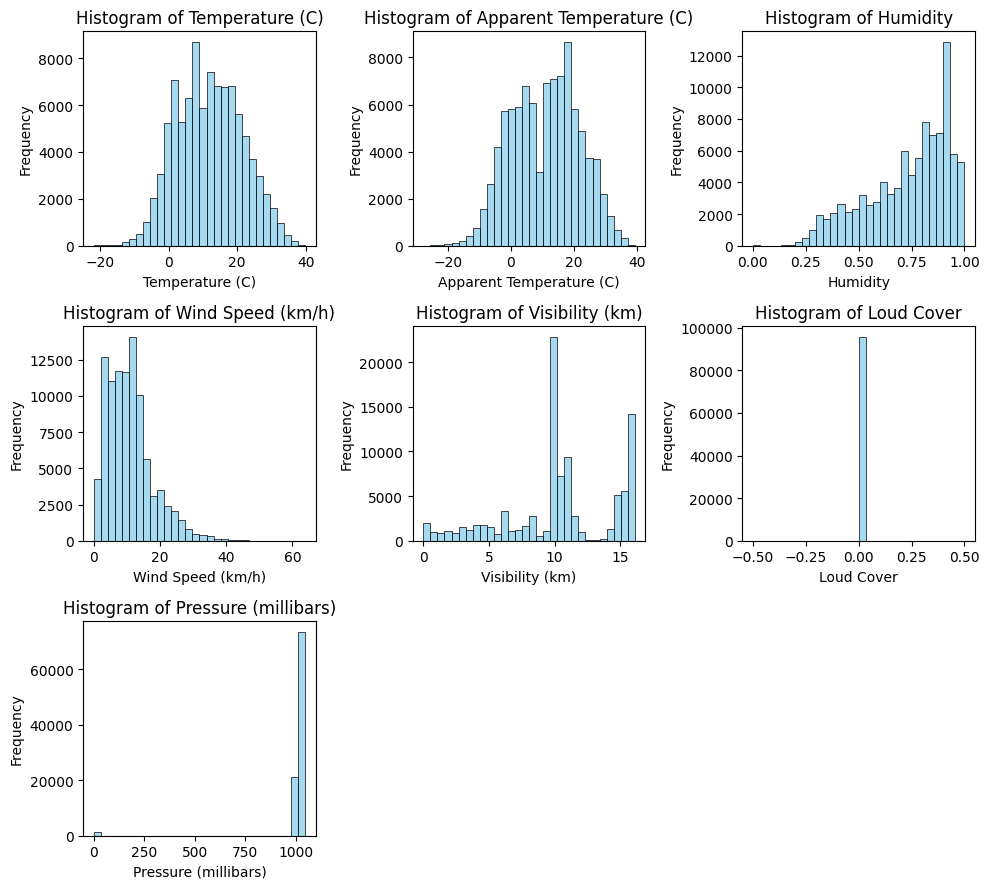

In [69]:
plot_histogram(df, numerical_cols)

Pada plot yang dihasilkan, dapat dilihat bahwa atribut **Wind Speed** dan **Humidity** memiliki distribusi yang **skewed**.

**Skewed** berarti distribusi data tidak simetris. Ada dua jenis skewness:
- **Positive Skew (Right Skew):** Data terkonsentrasi di sisi kiri dan ekor lebih panjang di sisi kanan.
- **Negative Skew (Left Skew):** Data terkonsentrasi di sisi kanan dan ekor lebih panjang di sisi kiri.

Distribusi yang **skewed** menunjukkan bahwa data tidak terdistribusi secara normal.

**Distribusi normal** adalah distribusi simetris di mana data terpusat di tengah (mean), dan semakin menjauh dari pusat, semakin sedikit data yang ada. Biasanya, distribusi normal membentuk kurva lonceng. Model analisis seperti regresi mengasumsikan distribusi data normal, sehingga data yang skewed perlu diubah.

Untuk itu, kita akan melakukan **transformasi** pada atribut **Wind Speed** dan **Humidity** untuk mengatasi skewness dan membuat distribusinya lebih mendekati distribusi normal.

Kita akan menggunakan transformasi untuk mengatasi **skewness** pada atribut yang distribusinya tidak normal, agar distribusi data menjadi lebih mendekati distribusi normal.

Pada atribut **Wind Speed (km/h)**, kita akan menggunakan **log transform**. Ini bertujuan untuk mengurangi skewness positif (right skew) dan membuat distribusi data lebih simetris, sehingga model dapat lebih baik dalam mempelajari hubungan antar fitur dan target.

Sedangkan pada atribut **Humidity**, kita akan menggunakan **square root transform**. Transformasi ini membantu mengurangi skewness dan memperbaiki distribusi data, sehingga analisis dan pelatihan model menjadi lebih stabil dan efektif.

In [70]:
def log_transform(df, col):
    """
    Apply log transformation to a numerical feature.
    """
    df[col] = np.log1p(df[col])

    return df

def sqrt_transform(df, col):
    """
    Applies square root transformation to handle left-skewed data.
    """
    
    df[col] = df[col] ** 0.5
    
    return df

In [71]:
df = log_transform(df, 'Wind Speed (km/h)')
df = sqrt_transform(df, 'Humidity')

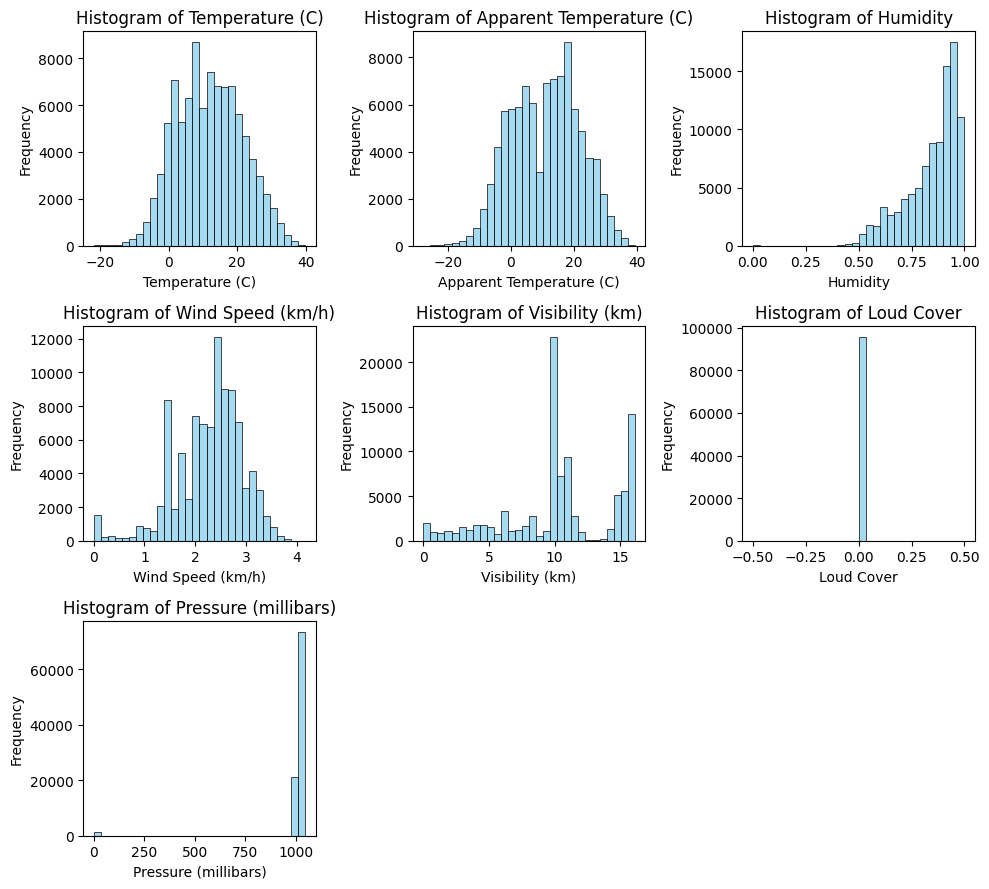

In [72]:
plot_histogram(df, numerical_cols)

Dapatkah anda melihat perbedaan distribusi pada atribut **Wind Speed (km/h)** dan **Humidity** sebelum dan sesudah dilakukan transformasi ?

Selanjutnya, kita akan membuat plot **boxplot** untuk memvisualisasikan distribusi data pada setiap atribut numerik. Dengan menggunakan boxplot, kita dapat melihat beberapa informasi penting, salah satunya mendeteksi adanya **outlier** yang mungkin mempengaruhi analisis dan pelatihan model.


In [73]:
def plot_boxplot(df, numerical_cols):
    """
    Plot boxplots for numerical features to visualize the distribution and detect outliers.
    """
    
    num_plots = len(numerical_cols)
    num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(10, num_rows * 3))
    axes = axes.flatten() 
    
    for i, col in enumerate(numerical_cols):
        sns.boxplot(x=df[col], color='lightgreen', ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}")
        axes[i].set_xlabel(col)
    
    for i in range(num_plots, len(axes)):
        axes[i].axis('off') 
    
    plt.tight_layout()
    plt.show()

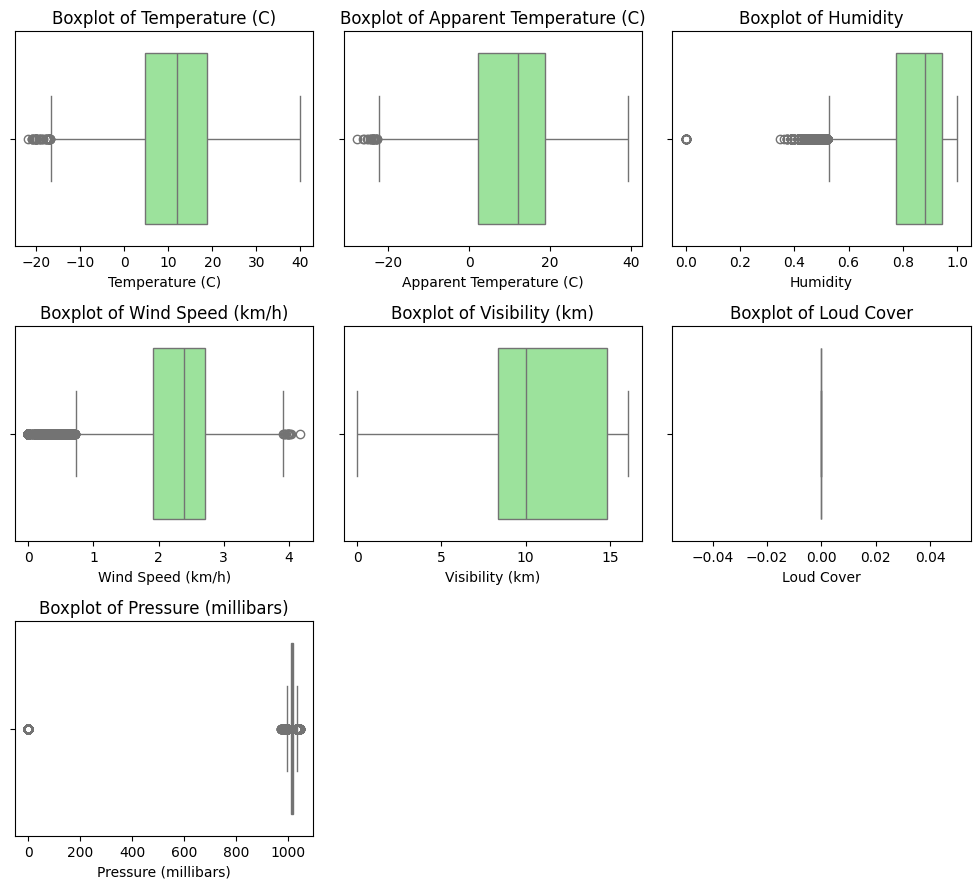

In [74]:
plot_boxplot(df, numerical_cols)

Untuk bisa mengetahui lebih jelas mengenai jumlah outlier yang terdapat pada masing-masing atribut, kita akan menghitung persentase **outlier** untuk setiap atribut numerik menggunakan metode **Interquartile Range (IQR)**. Dengan cara ini, kita dapat mengetahui sejauh mana data pada masing-masing atribut memiliki nilai ekstrim yang dapat mempengaruhi analisis dan pelatihan model.

In [75]:
def calculate_outliers(df, column):
    """
    Menghitung persentase outlier pada suatu fitur menggunakan metode IQR.
    """
    # Menghitung Q1 (kuartil pertama), Q3 (kuartil ketiga), dan IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menentukan jumlah outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Menghitung persentase outlier
    percentage_outliers = (len(outliers) / len(df)) * 100
    
    return percentage_outliers

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    percentage_outliers = calculate_outliers(df, col)
    print(f"{col}: {percentage_outliers:.2f}% outliers")

Temperature (C): 0.04% outliers
Apparent Temperature (C): 0.02% outliers
Humidity: 1.19% outliers
Wind Speed (km/h): 2.45% outliers
Visibility (km): 0.00% outliers
Loud Cover: 0.00% outliers
Pressure (millibars): 4.61% outliers


Karena persentase outlier yang ada cukup kecil, kita memutuskan untuk **tidak menghapus outlier** dalam dataset ini dan akan melanjutkan proses analisis dan pelatihan model.

Selanjutnya, kita akan melakukan **scaling** pada beberapa atribut numerik agar fitur-fitur tersebut berada dalam rentang yang sesuai untuk digunakan dalam model. Beberapa atribut akan kita **standardize** untuk mendapatkan distribusi dengan rata-rata 0 dan variansi 1, sementara yang lainnya akan kita **min-max scale** agar nilainya berada dalam rentang 0 hingga 1.

In [76]:
def minmax_scale(df, col):
    """
    Menykalakan nilai fitur antara 0 dan 1.
    """
    min_val = df[col].min()
    max_val = df[col].max()
    
    if max_val == min_val:
        df[col] = 0.5  
    else:
        df[col] = (df[col] - min_val) / (max_val - min_val)
    
    return df

def standard_scale(df, col):
    """
    Menstandarisasi nilai fitur agar memiliki rata-rata 0 dan variansi 1.
    """
    mean_val = df[col].mean()
    std_val = df[col].std()
    
    if std_val == 0:
        df[col] = 0  
    else:
    
        df[col] = (df[col] - mean_val) / std_val
    
    return df

df = standard_scale(df, 'Temperature (C)')
df = standard_scale(df, 'Apparent Temperature (C)')
df = minmax_scale(df, 'Humidity')
df = standard_scale(df, 'Wind Speed (km/h)')
df = minmax_scale(df, 'Visibility (km)')
df = minmax_scale(df, 'Pressure (millibars)')

Selanjutnya, kita akan melakukan **Label Encoding** pada fitur kategorikal yang ada dalam dataset. **Label Encoding** akan mengubah nilai kategori menjadi angka, yang memungkinkan kita untuk memprosesnya dalam model pembelajaran mesin. Pada contoh ini, kita akan melakukan encoding pada kolom-kolom seperti **Summary**, **Precip Type**, dan **Wind Bearing (degrees)**.

In [77]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, col):
    """
    Encode categorical features using label encoding.
    """
    
    # Isi dengan kode untuk melakukan label encoder pada kolom tertentu
    le = LabelEncoder()
    not_null_indices = df[col].notna()

    if not_null_indices.any():
        df.loc[not_null_indices, col] = le.fit_transform(df.loc[not_null_indices, col])
    
    
    return df

df = label_encode(df, 'Summary')
df = label_encode(df, 'Precip Type')
df = label_encode(df, 'Wind Bearing (degrees)')

Selanjutnya, kita akan melihat **heatmap korelasi** untuk memvisualisasikan hubungan antara fitur-fitur dalam dataset. Heatmap ini akan membantu kita memahami seberapa kuat hubungan antar variabel dan apakah terdapat fitur yang sangat berkorelasi, yang dapat mempengaruhi model yang akan dibangun.

In [78]:
def plot_correlation_heatmap(df, numerical_cols):
    """
    Plot a heatmap to visualize the correlation between numerical features.
    """
    plt.figure(figsize=(12, 6))
    
    correlation_matrix = df[numerical_cols].corr() 
    
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("🔹 Correlation Heatmap")
    plt.show()

/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


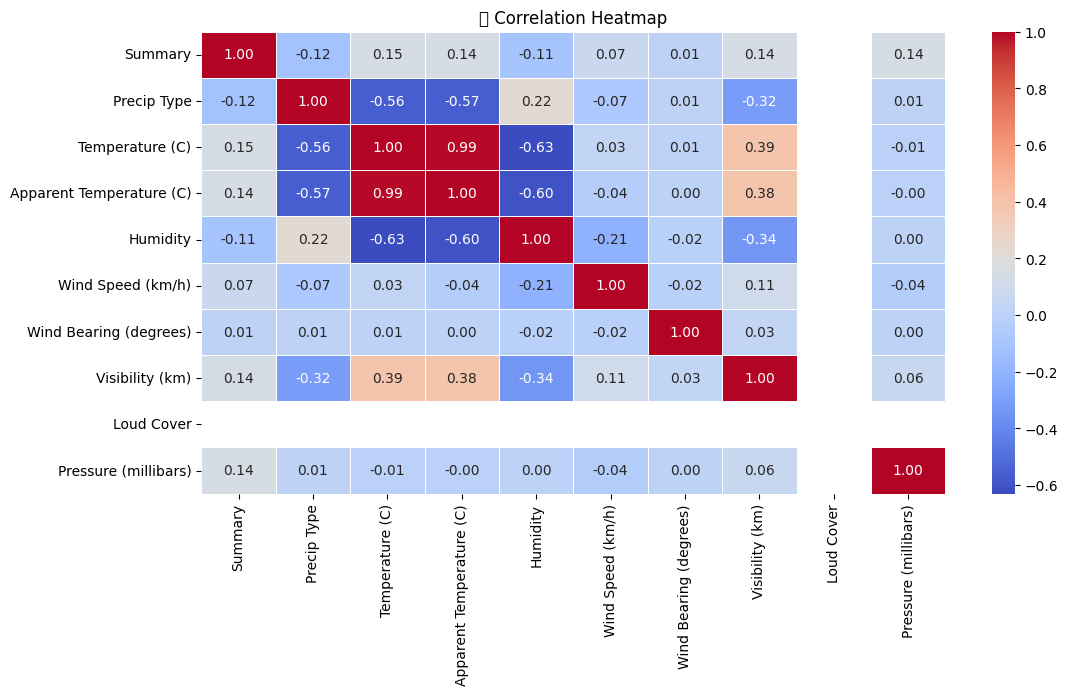

In [79]:
plot_correlation_heatmap(df, df.columns)

Dalam dataset ini, **Apparent Temperature (C)** merupakan variabel target atau **y** yang ingin kita prediksi. Dari hasil heatmap korelasi, kita dapat melihat bahwa beberapa atribut memiliki keterkaitan dengan **Apparent Temperature**, meskipun korelasi tersebut tidak terlalu kuat. Banyak atribut yang menunjukkan **ketidak-korelasi** yang signifikan dengan **Apparent Temperature**.

Namun demikian, meskipun korelasi antar fitur tidak terlalu tinggi dengan target, kita akan tetap menggunakan **seluruh atribut** yang tersedia untuk melatih model. Hal ini bertujuan untuk memberikan model data yang lebih kaya dan memungkinkan eksplorasi yang lebih baik terhadap hubungan antara fitur dan target.


Langkah selanjutnya adalah mempersiapkan data untuk melatih model. Pertama-tama, kita akan membagi dataset menjadi dua bagian, yaitu **training set** dan **test set** menggunakan teknik **train-test split**.


In [80]:
from sklearn.model_selection import train_test_split

def train_test_split_custom(df, target_col, test_size=0.1, random_state=42):
    """
    Function to split data into training and testing sets.
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Gantilah bagian ini dengan kode untuk membagi data menjadi training dan testing set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(df, "Apparent Temperature (C)", test_size=0.1)

Setelah mempersiapkan data, langkah berikutnya adalah melatih model regresi. Pada tugas ini, kita akan melatih beberapa model regresi untuk memprediksi **Apparent Temperature** berdasarkan fitur-fitur yang ada dalam dataset. Model regresi yang akan digunakan termasuk **Linear Regression**, **Ridge Regression**, **Decision Tree Regressor**, **Random Forest Regressor**, **Gradient Boosting**, dan **Support Vector Regressor**. Tujuan dari pelatihan ini adalah untuk mengevaluasi kinerja masing-masing model menggunakan metrik yang sesuai dan memilih model terbaik berdasarkan hasil yang diperoleh.


In [81]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

def train_models_regression(X_train, X_test, y_train, y_test):
    """
    Train and compare multiple regression models
    """
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "SVR": SVR()
    }
    
    print("🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹")
    for name, model in models.items():
        # Melatih model dengan data training
        model.fit(X_train, y_train)
        
        # Membuat prediksi menggunakan data testing
        y_pred = model.predict(X_test)
        
        # Calculate R² and Mean Squared Error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        print("🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹")
        print(f"{name}\nR²: {r2:.4f}\nMean Squared Error: {mse:.4f}")
        print("🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹")
    
    print("🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹")

In [82]:
train_models_regression(X_train, X_test, y_train, y_test)

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
Linear Regression
R²: 0.9900
Mean Squared Error: 0.0100
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
Ridge Regression
R²: 0.9900
Mean Squared Error: 0.0100
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
Decision Tree
R²: 0.9999
Mean Squared Error: 0.0001
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
Random Forest
R²: 1.0000
Mean Squared Error: 0.0000
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
Gradient Boosting
R²: 0.9996
Mean Squared Error: 0.0004
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
SVR
R²: 0.9942
Mean Squared Error: 0.0057
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹


Setelah melatih beberapa model regresi dan memperoleh metrik evaluasi untuk masing-masing model, langkah selanjutnya adalah memberikan **interpretasi** mengenai hasil yang diperoleh. Praktikan diminta untuk menganalisis perbandingan antara model-model yang telah dilatih berdasarkan **R² (R-squared)** dan **Mean Squared Error (MSE)**.

- **Model yang lebih baik** dapat dilihat dari nilai **R²** yang lebih tinggi dan **MSE** yang lebih rendah.
- Bandingkan kinerja model-model yang digunakan dan tentukan model mana yang paling efektif dalam memprediksi **Apparent Temperature**.

Jawaban praktikan:

# Analisis Perbandingan Model Regresi untuk Memprediksi Apparent Temperature

## Ringkasan Hasil Pelatihan Model

Berikut adalah visualisasi perbandingan metrik evaluasi dari berbagai model yang telah dilatih:

| Model | R² | MSE |
|-------|------|------|
| **Random Forest** | 1.0000 | 0.0000 |
| **Decision Tree** | 0.9999 | 0.0001 |
| **Gradient Boosting** | 0.9996 | 0.0004 |
| **Linear Regression** | 0.9900 | 0.0100 |
| **Ridge Regression** | 0.9900 | 0.0100 |
| **SVR** | 0.9942 | 0.0057 |

## Interpretasi Hasil

Setelah menganalisis hasil pelatihan keenam model regresi tersebut, beberapa poin penting dapat diinterpretasikan:

### 1. Performa Model Terbaik

**Random Forest Regressor** menunjukkan performa paling unggul dengan nilai R² mencapai 1.0000 dan MSE 0.0000. Hasil ini mengindikasikan bahwa model mampu menjelaskan hampir seluruh variasi dalam data target (Apparent Temperature) dan memiliki tingkat kesalahan prediksi yang mendekati nol.

### 2. Hierarki Performa Model

Bila diurutkan dari performa terbaik hingga terendah berdasarkan R² dan MSE:
1. **Random Forest** (R²: 1.0000, MSE: 0.0000)
2. **Decision Tree** (R²: 0.9999, MSE: 0.0001)
3. **Gradient Boosting** (R²: 0.9996, MSE: 0.0004)
4. **SVR** (R²: 0.9942, MSE: 0.0057)
5. **Linear & Ridge Regression** (R²: 0.9900, MSE: 0.0100)

### 3. Analisis Model Ensemble vs Model Linear

Model ensemble (Random Forest, Gradient Boosting) dan model berbasis pohon (Decision Tree) menunjukkan performa yang lebih baik dibandingkan model linear (Linear Regression, Ridge Regression). Hal ini mengindikasikan adanya pola non-linear dalam hubungan antara fitur-fitur cuaca dengan Apparent Temperature.

### 4. Evaluasi Ridge Regression

Ridge Regression tidak menunjukkan peningkatan dibandingkan Linear Regression standar (keduanya memiliki R² dan MSE yang identik). Ini menandakan bahwa regularisasi L2 yang diterapkan Ridge mungkin tidak memberikan dampak signifikan karena data tidak menunjukkan masalah multikolinearitas yang berat.

### 5. Performa SVR

Support Vector Regressor (SVR) menunjukkan performa yang cukup baik (R²: 0.9942) namun tidak sebaik model ensemble. SVR memerlukan tuning parameter yang lebih intensif untuk mencapai performa optimal.

## Kesimpulan

Berdasarkan hasil evaluasi, **Random Forest Regressor** merupakan model terbaik untuk memprediksi Apparent Temperature menggunakan dataset cuaca ini. Model ini menunjukkan kemampuan luar biasa dalam menangkap pola kompleks dalam data tanpa mengalami overfitting yang signifikan pada set testing.

Kemampuan model ensemble untuk menangkap hubungan non-linear antara fitur-fitur cuaca dan Apparent Temperature menjadi keunggulan utama dibandingkan model linear. Dengan R² sempurna dan MSE mendekati nol, Random Forest dapat diandalkan untuk memberikan prediksi yang sangat akurat.

## Rekomendasi

1. **Pilihan Model**: Implementasikan Random Forest sebagai model utama untuk sistem prediksi Apparent Temperature.

2. **Eksplorasi Lebih Lanjut**: Meskipun Random Forest menunjukkan performa sempurna, perlu dilakukan validasi silang (cross-validation) untuk memastikan konsistensi performa model pada berbagai subset data.

3. **Interpretabilitas**: Jika interpretabilitas model menjadi pertimbangan penting, Decision Tree dapat menjadi alternatif yang baik dengan performa hampir sempurna (R²: 0.9999) dan struktur yang lebih mudah diinterpretasi.

4. **Efisiensi Komputasi**: Untuk skenario dengan keterbatasan komputasi, Linear atau Ridge Regression tetap menjadi pilihan yang layak dengan performa yang masih sangat baik (R²: 0.9900).

Dengan hasil yang sangat menjanjikan ini, model-model yang telah dilatih dapat digunakan untuk memprediksi Apparent Temperature berdasarkan kondisi cuaca dengan tingkat akurasi yang sangat tinggi.
